# A08 - [Project: Scraping Nuclear Reactors](https://dtkaplan.github.io/DataComputingEbook/project-scraping-nuclear-reactors.html#project-scraping-nuclear-reactors)
Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

https://davefriedman01.github.io/Mathematics/computer/program/rlang/STAT184/intro.html

---

```{admonition} Revised
19 Jun 2023
```
```{contents}
```

---

## Programming Environment

In [1]:
library(lubridate)
library(rvest)
library(tidyverse)

str_c('EXECUTED : ', now())
sessionInfo()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.2     ✔ readr   2.1.4
✔ forcats 1.0.0     ✔ stringr 1.5.0
✔ ggplot2 3.4.2     ✔ tibble  3.2.1
✔ purrr   1.0.1     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "EXECUTED : 2023-06-20 00:53:06.853684"

R version 4.3.0 (2023-04-21)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_1.0.0   stringr_1.5.0   dplyr_1.1.2     purrr_1.0.1    
 [5] readr_2.1.4     tidyr_1.3.0     tibble_3.2.1    ggplot2_3.4.2  
 [9] tidyverse_2.0.0 rvest_1.0.3     lubridate_1.9.2

loaded via a namespace (and not attached):
 [1] gtable_0.3.3     jsonlite_1.8.5   compiler_4.3.0   crayon_1.5.2    
 [5] tidyselect_1.2.0 IRdisplay_1.1    xml2_1.3.4       scales_1.2.1    
 [9] uuid_1.1-0       fastma

---

In what ways is the table tidy? How is it not tidy? What's different about it from a tidy table?

Tidy Data Criteria
* (i) rows (or cases, observations) must each represent the same underlying attribute (i.e., each observation must have its own row)
* (ii) columns (or variables, values) must each contain the same type of value for each row (i.e., each variable must have its own column)
* (iii) each value must have its own cell
* It's impossible to only satisfy two of the three criteria. This implies the following.
  * (i) put each dataset into a tibble
  * (ii) put each variable into a column

There is at least one row that does not represent a typical case (that is, the header row(s)). Certain columns are blank and need to be removed. The remaining columns may contain heterogeneous data formats or data types. And missing values must be addressed. But with some cleaning, the table hints at what a typical case should look like.

In [2]:
page      <- 'https://en.wikipedia.org/wiki/List_of_commerical_nuclear_reactors'
tableList <-
  page %>%
    read_html() %>%
    html_nodes(css = 'table') %>%
    html_table(fill = TRUE)
length(tableList)

Japan <-
  tableList[[21]] %>%
    select(1:9)
#names(Japan)[c(3, 6)] <- c('type', 'grossMW')
head(Japan)

[1] 55

Plantname,UnitNo.,Type,Model,Status,Capacity(MW),Beginbuilding,Commercialoperation,Closed
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Plantname,UnitNo.,Type,Model,Status,Capacity(MW),Beginbuilding,Commercialoperation,Closed
Fukushima Daiichi,1,BWR,BWR-3,Inoperable,439,25 Jul 1967,26 Mar 1971,19 May 2011
Fukushima Daiichi,2,BWR,BWR-4,Inoperable,760,9 Jun 1969,18 Jul 1974,19 May 2011
Fukushima Daiichi,3,BWR,BWR-4,Inoperable,760,28 Dec 1970,27 Mar 1976,19 May 2011
Fukushima Daiichi,4,BWR,BWR-4,Inoperable,760,12 Feb 1973,12 Oct 1978,19 May 2011
Fukushima Daiichi,5,BWR,BWR-4,Shut down,760,22 May 1972,18 Apr 1978,17 Dec 2013


Among other things, some of the variable names appear redundant and others have multiple words separated by spaces. You can rename variables using the data verb `rename()`, finding appropriate names from the Wikipedia table. Another problem is that the first row is not data but a continuation of the variable names. So row number 1 should be dropped.

In [3]:
Japan <-
  Japan %>%
    filter(row_number() > 1) %>%
    rename(
      name         = Plantname,
      reactor      = `UnitNo.`,
      type         = Type,
      model        = Model,
      status       = Status,
      netMW        = `Capacity(MW)`,
      construction = Beginbuilding,
      operation    = Commercialoperation,
      closure      = Closed
    )
head(Japan)

name,reactor,type,model,status,netMW,construction,operation,closure
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Fukushima Daiichi,1,BWR,BWR-3,Inoperable,439,25 Jul 1967,26 Mar 1971,19 May 2011
Fukushima Daiichi,2,BWR,BWR-4,Inoperable,760,9 Jun 1969,18 Jul 1974,19 May 2011
Fukushima Daiichi,3,BWR,BWR-4,Inoperable,760,28 Dec 1970,27 Mar 1976,19 May 2011
Fukushima Daiichi,4,BWR,BWR-4,Inoperable,760,12 Feb 1973,12 Oct 1978,19 May 2011
Fukushima Daiichi,5,BWR,BWR-4,Shut down,760,22 May 1972,18 Apr 1978,17 Dec 2013
Fukushima Daiichi,6,BWR,BWR-5,Shut down,1067,26 Oct 1973,24 Oct 1979,17 Dec 2013


In [4]:
str(Japan)

tibble [68 × 9] (S3: tbl_df/tbl/data.frame)
 $ name        : chr [1:68] "Fukushima Daiichi" "Fukushima Daiichi" "Fukushima Daiichi" "Fukushima Daiichi" ...
 $ reactor     : chr [1:68] "1" "2" "3" "4" ...
 $ type        : chr [1:68] "BWR" "BWR" "BWR" "BWR" ...
 $ model       : chr [1:68] "BWR-3" "BWR-4" "BWR-4" "BWR-4" ...
 $ status      : chr [1:68] "Inoperable" "Inoperable" "Inoperable" "Inoperable" ...
 $ netMW       : chr [1:68] "439" "760" "760" "760" ...
 $ construction: chr [1:68] "25 Jul 1967" "9 Jun 1969" "28 Dec 1970" "12 Feb 1973" ...
 $ operation   : chr [1:68] "26 Mar 1971" "18 Jul 1974" "27 Mar 1976" "12 Oct 1978" ...
 $ closure     : chr [1:68] "19 May 2011" "19 May 2011" "19 May 2011" "19 May 2011" ...


Using your cleaned data, make a plot of net generation capacity versus date of construction. Color the points by the type of reactor (for example, BWR, PWR, etc.) In addition to your plot, give a sentence or two of interpretation; what patterns do you see?

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `closure = lubridate::dmy(closure)`.
Caused by warning:
!  6 failed to parse.”


name,reactor,type,model,status,netMW,construction,operation,closure
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<date>,<date>,<date>
Fukushima Daiichi,1,BWR,BWR-3,Inoperable,439,1967-07-25,1971-03-26,2011-05-19
Fukushima Daiichi,2,BWR,BWR-4,Inoperable,760,1969-06-09,1974-07-18,2011-05-19
Fukushima Daiichi,3,BWR,BWR-4,Inoperable,760,1970-12-28,1976-03-27,2011-05-19
Fukushima Daiichi,4,BWR,BWR-4,Inoperable,760,1973-02-12,1978-10-12,2011-05-19
Fukushima Daiichi,5,BWR,BWR-4,Shut down,760,1972-05-22,1978-04-18,2013-12-17
Fukushima Daiichi,6,BWR,BWR-5,Shut down,1067,1973-10-26,1979-10-24,2013-12-17


Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


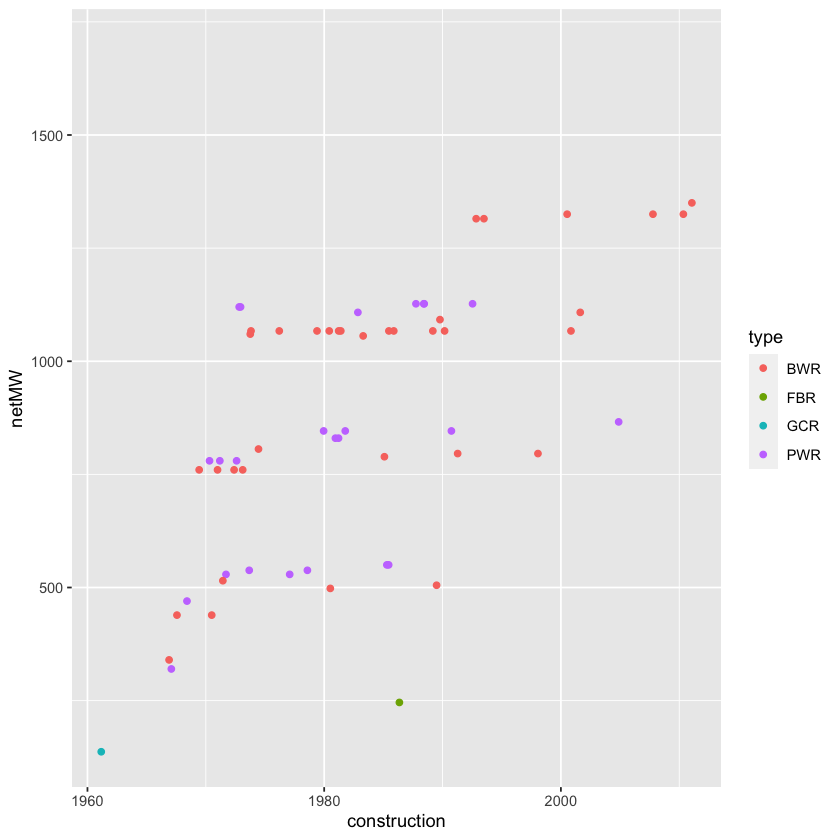

In [5]:
# BWR boiling water reactor
# FBR
# GCR
# PWR pressurized water reactor

Japan <-
  Japan %>%
    mutate(
      netMW        = as.integer(netMW),
      construction = lubridate::dmy(construction),
      operation    = lubridate::dmy(operation),
      closure      = lubridate::dmy(closure)
    )
head(Japan)

Japan %>%
  ggplot(mapping = aes(x = construction, y = netMW)) +
    geom_point(aes(color = type))

Carry out the same cleaning process for the China reactor table, and then append it with the Japan data. Use `mutate()` to add a variable that has the name of the country. (Hint: functions such as `bind_cols()` or `bind_rows()` form the `dplyr` package are helpful for appending data frames.) Collating the data for all countries is a matter of repeating this process over and over. Inevitably, there are inconsistencies. For example, the US data had been organized in a somewhat different format when compared to the Japan and China data for many years until Wikipedia editors decided to reconcile them.

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `construction = lubridate::dmy(construction)`.
Caused by warning:
!  15 failed to parse.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“Removed 47 rows containing missing values (`geom_point()`).”


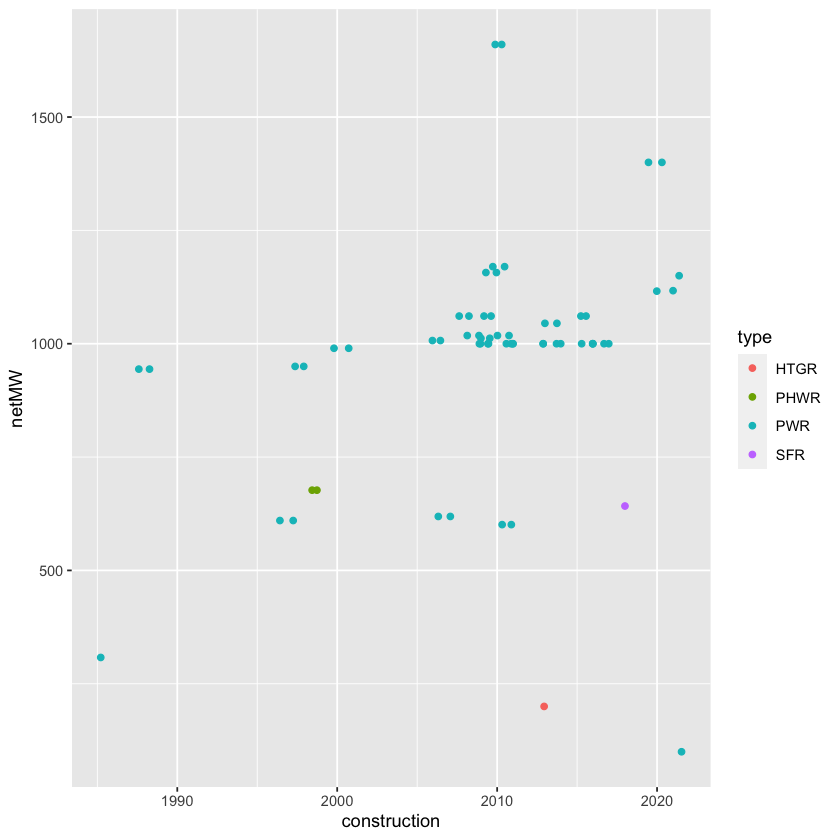

In [6]:
China <-
  tableList[[10]] %>%
    select(1:9)
China <-
  China %>%
    filter(row_number() > 2) %>%
    rename(
      name         = Plantname,
      reactor      = `UnitNo.`,
      type         = Type,
      model        = Model,
      status       = Status,
      netMW        = `Capacity(MW)`,
      construction = Beginbuilding,
      operation    = Commercialoperation,
      closure      = Closed
    )
China <-
  China %>%
    mutate(
      netMW        = as.integer(netMW),
      construction = lubridate::dmy(construction),
      operation    = lubridate::dmy(operation),
      closure      = lubridate::dmy(closure)
    )
China %>%
  ggplot(mapping = aes(x = construction, y = netMW)) +
    geom_point(aes(color = type))

In [7]:
bind_rows(Japan, China) %>%
  mutate(Country = ifelse(name %in% unique(Japan$name), 'Japan', 'China')) %>%
  head()

name,reactor,type,model,status,netMW,construction,operation,closure,Country
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<date>,<date>,<date>,<chr>
Fukushima Daiichi,1,BWR,BWR-3,Inoperable,439,1967-07-25,1971-03-26,2011-05-19,Japan
Fukushima Daiichi,2,BWR,BWR-4,Inoperable,760,1969-06-09,1974-07-18,2011-05-19,Japan
Fukushima Daiichi,3,BWR,BWR-4,Inoperable,760,1970-12-28,1976-03-27,2011-05-19,Japan
Fukushima Daiichi,4,BWR,BWR-4,Inoperable,760,1973-02-12,1978-10-12,2011-05-19,Japan
Fukushima Daiichi,5,BWR,BWR-4,Shut down,760,1972-05-22,1978-04-18,2013-12-17,Japan
Fukushima Daiichi,6,BWR,BWR-5,Shut down,1067,1973-10-26,1979-10-24,2013-12-17,Japan


Make an informative graphic that shows how long it took between start of construction and commissioning for operation of each nuclear reactor in Japan (or another country of your choice). One possibility: use reactor name vs date as the frame. For each reactor, set the glyph to be a line extending from start of construction to commissioning. You can do this with `geom_segment()` using name as the y coordinate and time as the x coordinate. (Tip: use the `paste()` function to create the `reactorID` on the vertical axis.)

Warning message:
“Removed 10 rows containing missing values (`geom_segment()`).”


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Higashidōri (Tōhoku) 1' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Higashidōri (Tōhoku) 1' in 'mbcsToSbcs': dot substituted for <8d>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Higashidōri (Tōhoku) 1' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Higashidōri (Tōhoku) 1' in 'mbcsToSbcs': dot substituted for <8d>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Higashidōri (Tōhoku) 2' in 'mbcsToSbcs': dot substituted for <c5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Higashidōri (Tōhoku) 2' in 'm

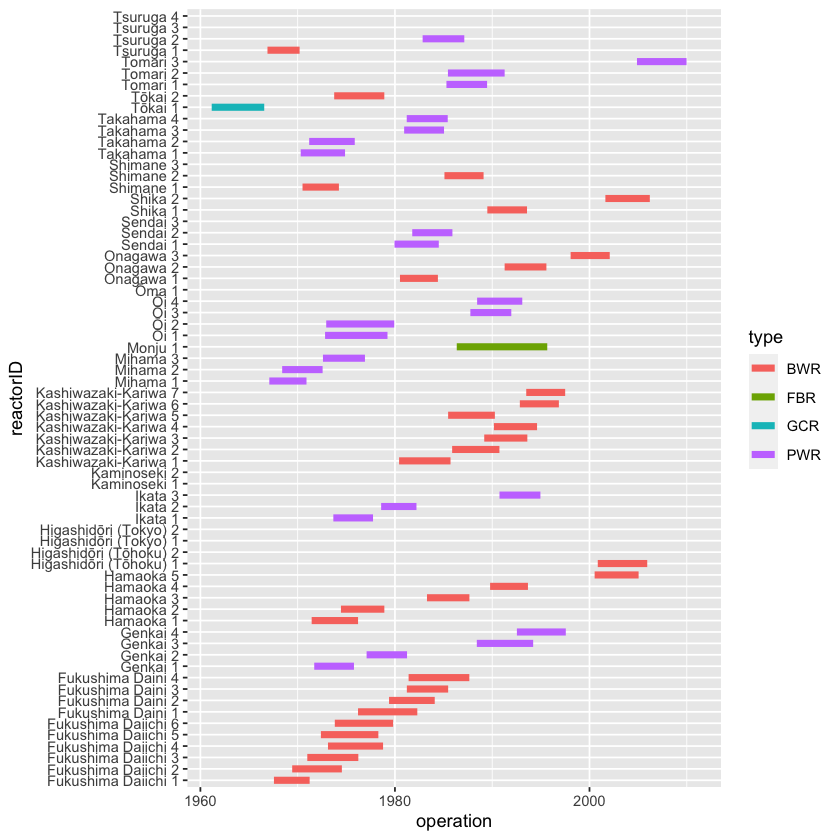

In [8]:
Japan %>%
  mutate(
    reactorID = paste(name, reactor),
    time      = operation - construction
  ) %>%
  ggplot() +
    geom_segment(
      linewidth = 2,
      mapping = aes(
        x     = operation,
        xend  = construction,
        y     = reactorID,
        yend  = reactorID,
        color = type
      )
    )

---